# Analyzing Global Suicide Data From Different Factors

Zhiqiang

## Overview

Suicide is a serious healthy problem that will cause people dead. According to the description from Wikipedia, suicides causes 828,000 people to end their life worldwide in 2015 and now is the 10th leading cause of death. . It is important to be aware of increasing suicide rate in the world in order to save the life of people. From that, this tutorial introduces a deep analysis on homicide reports in the US from 1980 to 2014. In this final tutorials, we will collect data and parse it at begining, then processing and visualize it. Finally, it will create linear regression model to process the analysis and verify the hypotheses implied from it. my purpose is to discover which factors will biggest reasons that cause people to suicide in this dataset.

## Required Tools

I recommend using Jupyter Notebook since it is a python complier and with lots of good application for data analysis. You will also need to following libraries:

pandas
numpy
scikit-learn
matplotlib
folium

For the dataset, the homicide reports data can be retrived at https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016



## Part 1: Data Preparation

In [448]:
#import and install necessary packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly
from sklearn import preprocessing
import warnings
import statsmodels.formula.api as smf
import statsmodels.api as sm
import re
from numpy import nan
from itertools import islice
warnings.filterwarnings('ignore')
from statsmodels.formula.api import ols


In [455]:
data=pd.read_csv("master.csv")
data.columns
data

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


We first get the data from local csv file downloaded from kaggle.
This cvs file will cover:
1.country
2.year
3.sex
4.age
5.suicides_no
6.population
7.suicides/100k pop
8.country-year
9.HDI for year
10.gdp_for_year
11.gdp_per_capita
12.generation

we will mainly focus on country, year, sex, age, suicide_no, suicides/100k pop, and gdp_for_year

## Data Tidying
In this step, we will drop and remove the elements that we do not use on analysis such as country_year, HDI for year and generation. In addition, we also will rename the complex columns name to make it use for rest parts. 

In [456]:
data=data[data['year']!=2016]
data = data.drop('country-year', 1)
data = data.drop('HDI for year', 1)
data = data.drop('generation', 1)
data.rename({"suicides/100k pop": "suicide_rate"}, axis=1, inplace=True)
data.rename({" gdp_for_year ($) ": "gdp_per_year"}, axis=1, inplace=True)
data['gdp_per_year'] = data['gdp_per_year'].str.replace(",","").astype(float)
data.head()

,country,year,sex,age,suicides_no,population,suicide_rate,gdp_per_year,gdp_per_capita ($)
0,Albania,1987,male,15-24 years,21,312900,6.71,2.156625e+09,796
1,Albania,1987,male,35-54 years,16,308000,5.19,2.156625e+09,796
2,Albania,1987,female,15-24 years,14,289700,4.83,2.156625e+09,796
3,Albania,1987,male,75+ years,1,21800,4.59,2.156625e+09,796
4,Albania,1987,male,25-34 years,9,274300,3.28,2.156625e+09,796


## Part 2: Data Analysis and Visualization
At this point, our data is ready to analyze. In this part, we would like to visualize the data we just reselect and map in order to portray and explain the trend of suicide to the audience. Also, statistical measurement for this data is included as well.

### 2.1 Suicide By Year
Let us see how many suicide happened in every years. Now, we want to introduce how suicide distribute different years with visualization.

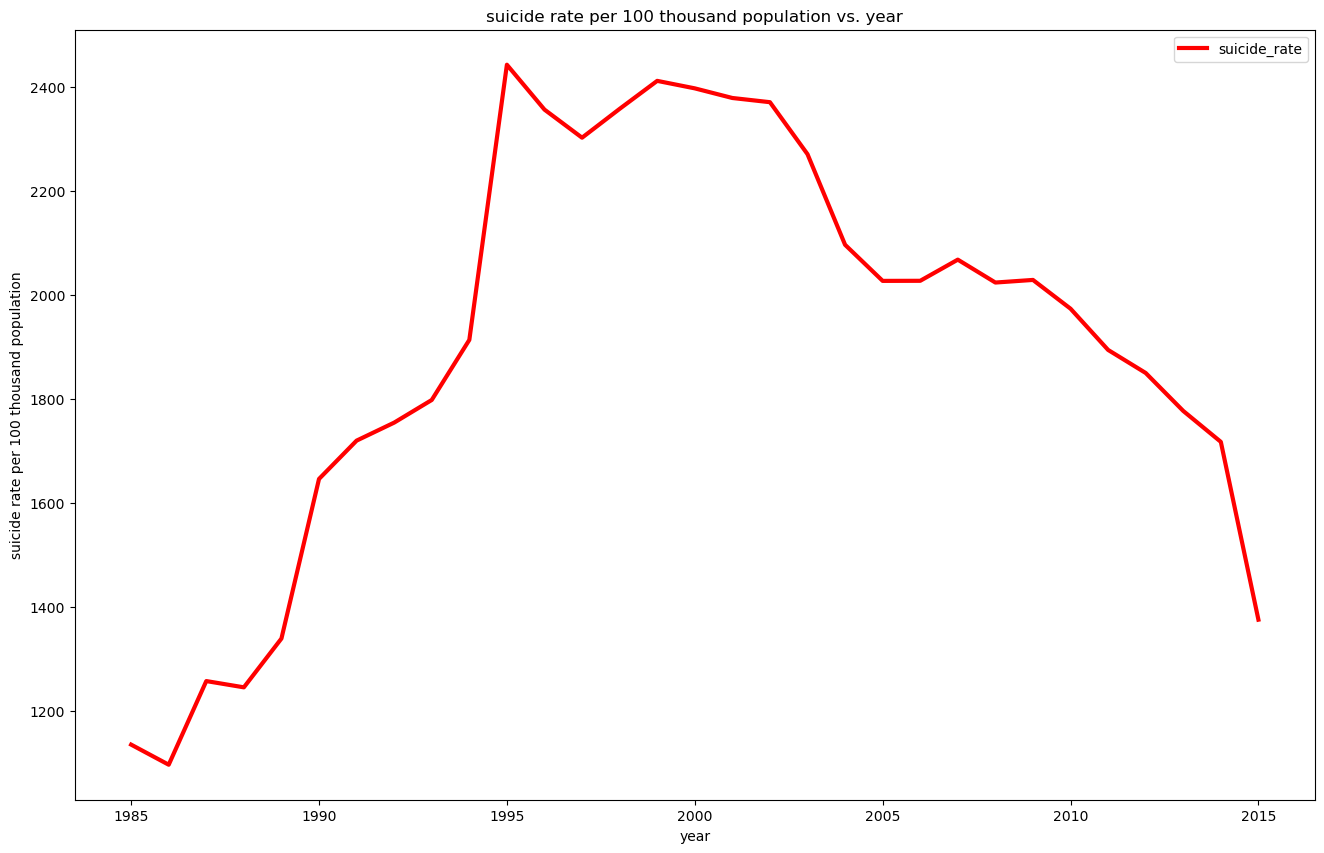

In [457]:

data2=data.groupby("year").sum()
size = len(np.unique(data['age']))
data2['suicide_rate'] = data2['suicide_rate'] / float(size)
data2=data2.drop(columns=['population','suicides_no','gdp_per_capita ($)','gdp_per_year'])
graph=data2.plot(y='suicide_rate',figsize=(16,10),color="red",linewidth=3)
xlabel=graph.set_xlabel('year')
ylabel=graph.set_ylabel('suicide rate per 100 thousand population')
title=graph.set_title('suicide rate per 100 thousand population vs. year')

From the chart, we can see that suicide rate reached a peak around 1995 and then has been decreasing gradually.

### 2.2 Suicide by Gender
Let us see how many suicide happened in different gender. Now, we want to introduce how suicide distribute different gender periods with visualization.

We can see that  5176811  male was suicided, and 1556006  female was suicided.


(-1.177184262796714,
 1.1658566581523724,
 -1.1873359194869284,
 1.182500375682236)

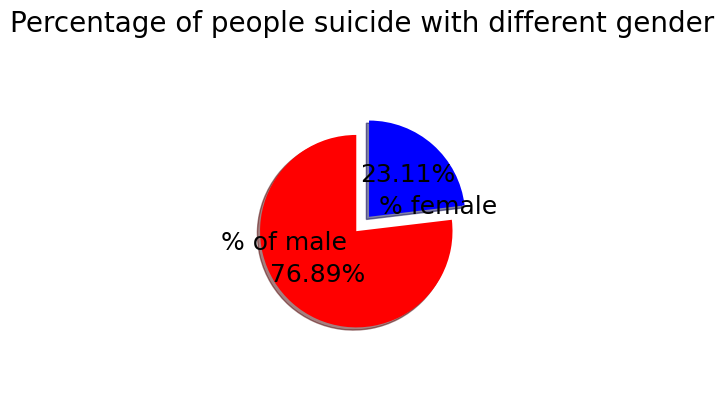

In [458]:
data3=data.groupby(["sex","year"]).sum()
data3 = data3.reset_index()
msuicide = data3[data3['sex']== 'male'].sum().suicides_no                                                     
fsuicide = data3[data3['sex']== 'female'].sum().suicides_no     
print("We can see that ", msuicide , " male was suicided, and", 
      fsuicide, " female was suicided.")
colors=["red","blue"]

# plot pie with gender
labels= ['% of male', '% female']
sizes = [msuicide, fsuicide]
ax = plt.subplot(1,2,1)
plt.pie(sizes,labels=labels, colors=colors, startangle=90, shadow=True,explode=(0.1, 0.1), autopct='%1.2f%%', 
        textprops={'fontsize': 18}, labeldistance= 0.15)
plt.title('Percentage of people suicide with different gender', fontsize = '20')
plt.axis('equal')

From the chart, we will see the male suicide rate will be much higher than female. More male population tend to suicide compare to female.

### 2.3 Suicide by age

Let us see how many suicide happened in every age period. Now, we want to introduce how suicide distribute different age periods with visualization.

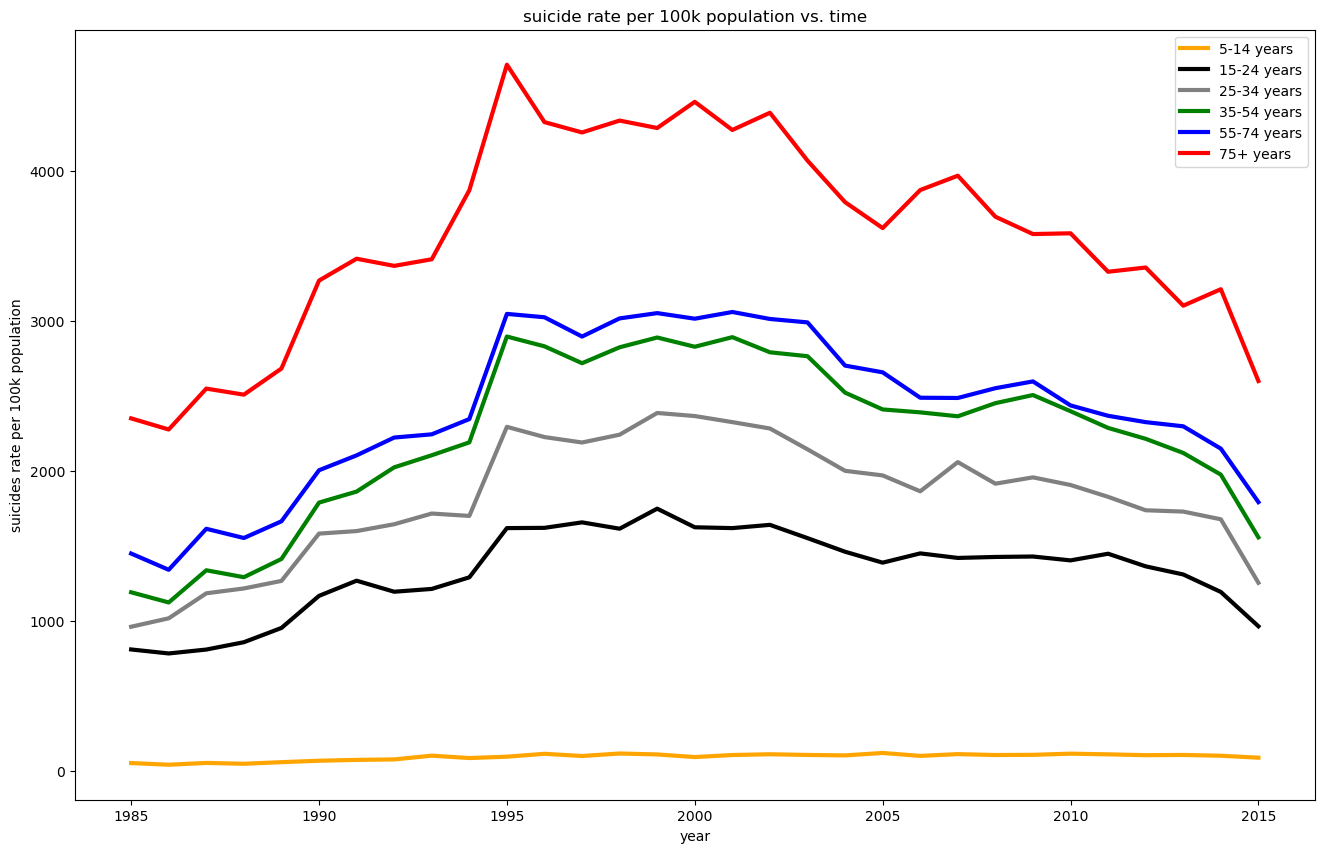

In [459]:
colors=["red","blue","green","grey","black","orange"]
data4 =data.groupby(["age","year"]).sum()
size = len(np.unique(data['age']))
data4['suicide_rate'] = data4['suicide_rate'] / float(size)
data4=data4.reset_index()
i=4
#make sure the order is correct
fig, ax = plt.subplots(figsize=(16,10))
for key, grp in df4.groupby(['age']):
    if(key=="5-14 years"):
        tempgroup=grp
ax = tempgroup.plot(ax=ax, kind='line', x='year', y='suicide_rate', label="5-14 years", color=colors[5],linewidth=3) 
for key, grp in df4.groupby(['age']):
    if(key!="5-14 years"):
        ax = grp.plot(ax=ax, kind='line', x='year', y='suicide_rate', label=key, color=colors[i],linewidth=3)
        i=i-1
    
        
plt.title('suicide rate per 100k population vs. time')
plt.xlabel('year')
plt.ylabel('suicides rate per 100k population')
plt.show()

From the chart, we can see people who have old ages more likely to suicide. The population with age period 75+ have highest rate of suicide.

### 2.4 Homicide By State

Let us see how many suicide happened in each country in the world. Now, we want to introduce how suicide distribute in the world with visualization.



Text(0.5, 1.0, 'country Vs Number of suicides')

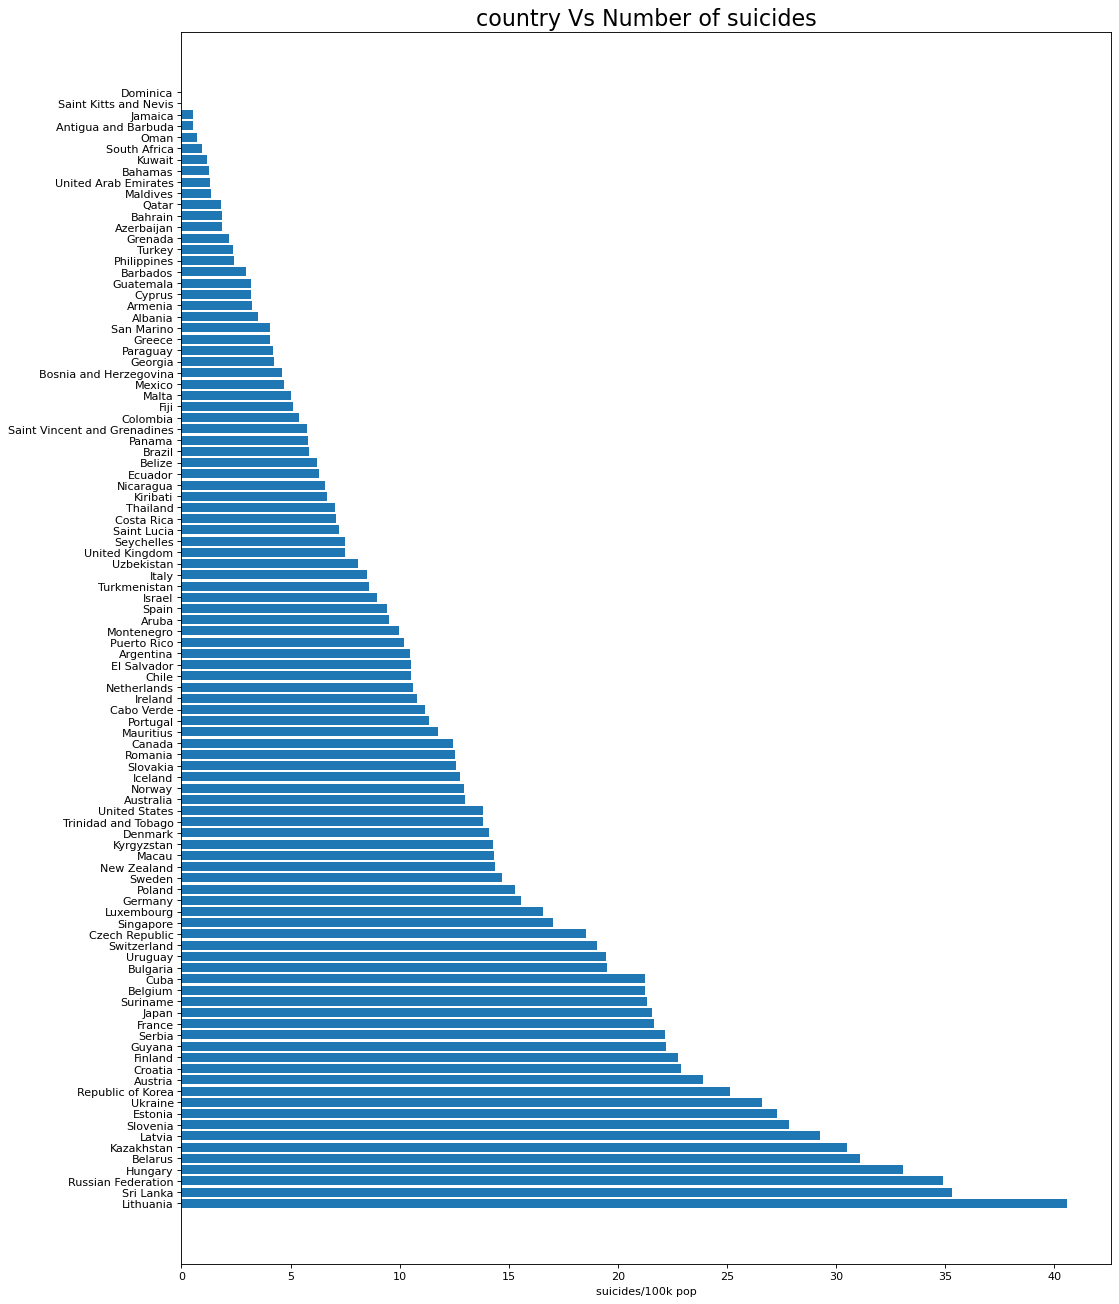

In [460]:
data6=data.groupby(["country"]).mean()
data6=data6.reset_index()
sort_data= data6.sort_values("suicide_rate", ascending=False)

plt.figure(figsize=(15, 20), dpi=80);
#Convert the State column to a numpy array
y_pos = np.arange(len(sort_data['country']))
#Put the data into the plot
plt.barh(y_pos, sort_data['suicide_rate'], align='center')
#Label y-axis
plt.yticks(y_pos, sort_data['country'])
#Label x-axis
plt.xlabel('suicides/100k pop')
#Create title of the plot
plt.title('country Vs Number of suicides', fontsize= 20)

From this bar chart, we can see that suicides rate differ between different countries. Overall, Lithuania, Sri Lanka, and Russian Federation have the highest suicides rate, and Jamaica, Sanit Kits and Nevis, and Dominica have the lowest suicides rate. Now we want to use a world map to provide audience a clear view.

In [461]:
fig = go.Figure(data=go.Choropleth(
    locations=data6['country'], # coordinate
    z = data6['suicide_rate'].astype(float), # Data to be color-coded
    locationmode = 'country names', # set of locations match entries in `locations`
    colorscale = 'YlGn',
    marker_line_color='black',
    colorbar_title = "suicides/100 thousand population",
    
))

fig.update_layout(
    title_text='Average Suicides Rate by Country From 1985 To 2015',
     geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
)

plotly.io.show(fig)

From the map, we will see the east Europe(which include Russia) has highest rate of suicide. America area do not have very high suicide rate. Moreover, most Asia and Africa area was empty due to lack of information.

### 2.4 Homicide By GDP
Let us see how many suicide happened in different gdp in the world. Now, we want to introduce how suicide distribute different gdp in the world with visualization.

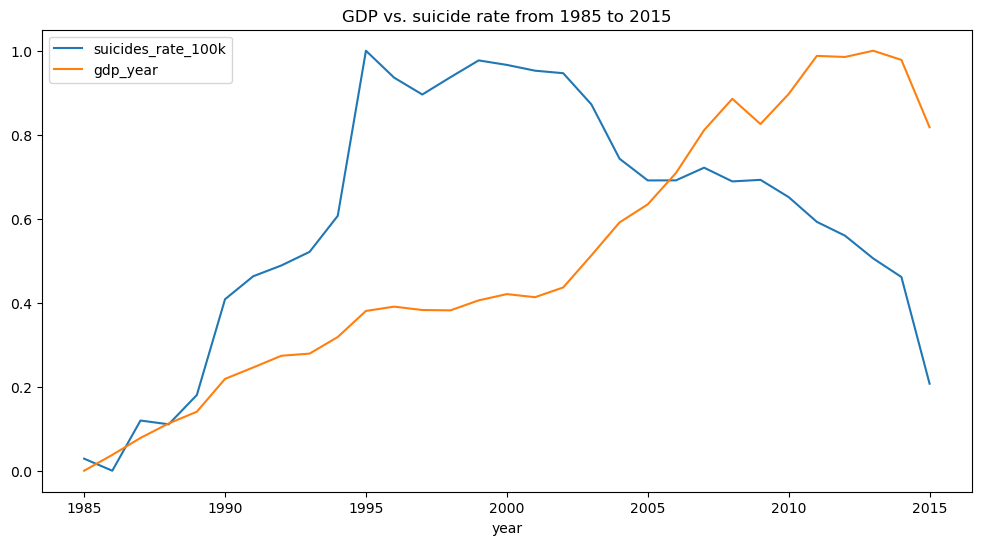

In [462]:
#copy new table and find suicide rate
data7=data.groupby(['year']).sum()
size = len(np.unique(data['age']))
data7['suicides_rate_100k'] = data7['suicide_rate'] /float(size)

size
data7['gdp_year'] = data7['gdp_per_year'] /float(size)

#normalize so it can compare
temp = data7.drop(columns=['population','suicides_no','gdp_per_capita ($)','gdp_per_year', 'suicide_rate'])
value = temp.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(value)
outhere= pd.DataFrame(x_scaled)
outhere.index=temp.index
outhere.columns=temp.columns
outhere.plot(figsize=(12,6))
plt.title('GDP vs. suicide rate from 1985 to 2015')
plt.show()


According the graph, we find it is hard to say that GDP and suicide has a strong linear relationship, because they are not increasing or decreasing at the same time. From 1990 to 2000, world GDP has only a little change, but the suicide rate has significant changed. And from 2005 to 2014, the GDP is increasing overall and suicide rate is decreasing. I guess there are another important factor or event in 1990 to 2000 period that affected suicide rate significantly. Even the GDP and suicide rate is not linear in worldwide, it might be linear in some countries. Let’s see the details of each country.

### Compare age and suicide rate 
I try to compare these two factor to check they have strong relationship or not.

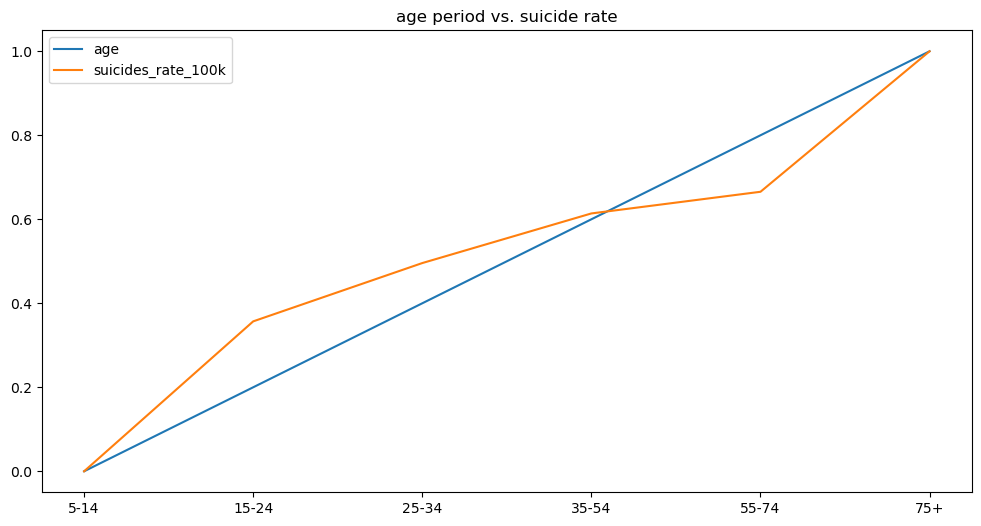

In [463]:
#copy data and sort it
test=data.groupby(['age']).mean()
size = len(np.unique(data['age']))
test['suicides_rate_100k'] = test['suicide_rate'] /float(size)
test = test.sort_values("suicides_rate_100k", ascending=True)
test = test.reset_index()
#get new table and drop uncessary data
temp = test.drop(columns=['year', 'population','suicides_no','gdp_per_capita ($)','gdp_per_year', 'suicide_rate'])

#change age to int to make readable
lt = preprocessing.LabelEncoder()
lt.fit([0, 1 , 2 , 3 , 4, 5] )
temp['age'] = lt.transform([0, 1 , 2 , 3 , 4, 5] )
bar = ['5-14', '15-24', '25-34', '35-54', '55-74', '75+']

#Plot the graph with the data
value = temp.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(value)
graph = pd.DataFrame(x_scaled)
graph.index=temp.index
graph.columns=temp.columns
graph.plot(figsize=(12,6))
plt.xticks(np.arange(len(bar)), bar)
plt.title('age period vs. suicide rate')
plt.show()

From that chart, I found that age have very strong relationship with suicide rate becasue when the age increasing, the suicide rate will increase too.

## Part 3: Linear Regression and Hypothesis Test
Now that we have our analysis done we can start doing linear regression and test our predictions. When doing a linear regression, we're taking data that is already there and predicting future data base on the patterns of the data we already have. We are going to take a linear regression of just our suicide rate with age data and compare it to other regression when taking different factors using a f test. And we predict that if we can account many factors, we will be able to have more accurate predictions.



### 3.1 Linear Regression on Homicide by Years
We will start creating the linear regression model for suicide rate with age data. We will be using the Linear Regression model library to create the model and to get our predicted values.

Refer to the documentation for more info http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

([<matplotlib.axis.XTick at 0x2269f1982e0>,
 [Text(0, 0, '5-14'),
  Text(1, 0, '15-24'),
  Text(2, 0, '25-34'),
  Text(3, 0, '35-54'),
  Text(4, 0, '55-74'),
  Text(5, 0, '75+')])

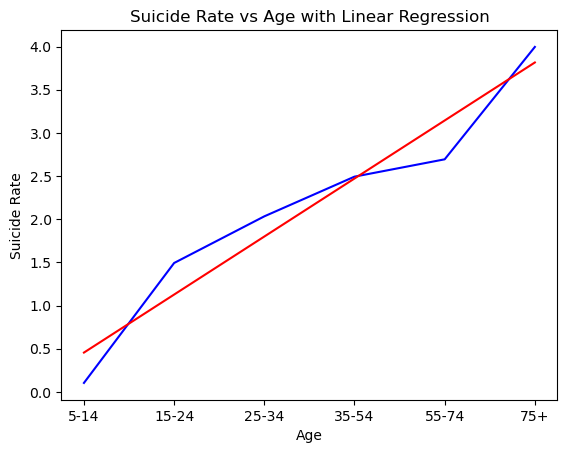

In [464]:

from sklearn import linear_model
#Linear Regression
reg = linear_model.LinearRegression()
X = [[x]for x in temp['age'].values]
Y = [[y] for y in temp['suicides_rate_100k'].values]
regfit = reg.fit(X, Y)
#Get predcited Values
pred_suicide = []
for x in temp['age'].values.reshape(6, 1):
    pred_suicide.append(regfit.predict([x])[0][0])
temp['pred_suicide'] = pd.Series(pred_suicide, index = temp.index)

#Plot the linear regression line with the data
bar = ['5-14', '15-24', '25-34', '35-54', '55-74', '75+']
plt.plot(temp['age'], temp['suicides_rate_100k'], color='blue',)
plt.plot(temp['age'], temp['pred_suicide'], color='red')
plt.xlabel("Age")
plt.ylabel("Suicide Rate")
plt.title("Suicide Rate vs Age with Linear Regression")
plt.xticks(np.arange(len(bar)), bar)

### 3.2 Fitting the Linear Regression Model
In this section, we would like to fit four different linear regressions. First is the regression with age vs suicide rate. rest will be the regression with both age and another four different factor. Here is the result for the first regression:

In [465]:
#Fit the first regression
regression = ols(formula='suicides_rate_100k ~ age', data=temp).fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     suicides_rate_100k   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     57.78
Date:                Fri, 16 Dec 2022   Prob (F-statistic):            0.00161
Time:                        23:32:18   Log-Likelihood:                -1.3305
No. Observations:                   6   AIC:                             6.661
Df Residuals:                       4   BIC:                             6.244
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4549      0.268      1.699      0.164      -0.288       1.198
age            0.6722      0.088      7.602      0.002       0.427       0.918
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.185
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.678
Skew:                          -0.405   Prob(JB):                        0.712
Kurtosis:                       1.565   Cond. No.                         5.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The second linear regression requires not only age but it also accounts for country that these suicide cases happened. Therefore, we predict that if we includes country as another factor, then this linear regression model will be more accurate. 
Here is the result for the second regression:

In [466]:
#Create new table with copy of data
table2 = data.groupby(['age', 'country']).mean()
table2 = table2.reset_index()
#Get the suicide_rate associated with age and country
temp2 = table2[['age', 'country', 'suicide_rate']]
lt = preprocessing.LabelEncoder()
lt.fit(table2['age'] )
temp2['age'] = lt.transform(table2['age'])

#Fit the second regression
regression2 = ols(formula='suicide_rate ~ country + age + country * age' , data=temp2).fit()
regression2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           suicide_rate   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     3.936
Date:                Fri, 16 Dec 2022   Prob (F-statistic):           1.48e-31
Time:                        23:32:18   Log-Likelihood:                -2092.6
No. Observations:                 600   AIC:                             4585.
Df Residuals:                     400   BIC:                             5465.
Df Model:                         199                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                       3.7901      7.016      0.540      0.589     -10.002      17.582
country[T.Antigua and Barbuda]                 -3.4935      9.922     -0.352      0.725     -22.999      16.012
country[T.Argentina]                            0.7579      9.922      0.076      0.939     -18.747      20.263
country[T.Armenia]                             -3.1720      9.922     -0.320      0.749     -22.677      16.333
country[T.Aruba]                                1.3965      9.922      0.141      0.888     -18.109      20.901
country[T.Australia]                            9.5408      9.922      0.962      0.337      -9.964      29.046
country[T.Austria]                              1.6436      9.922      0.166      0.869     -17.861      21.149
country[T.Azerbaijan]                          -2.6373      9.922     -0.266      0.791     -22.142      16.868
country[T.Bahamas]                             -2.0054      9.922     -0.202      0.840     -21.510      17.500
country[T.Bahrain]                             -0.4134      9.922     -0.042      0.967     -19.918      19.092
country[T.Barbados]                            -0.8527      9.922     -0.086      0.932     -20.358      18.652
country[T.Belarus]                             18.0912      9.922      1.823      0.069      -1.414      37.596
country[T.Belgium]                              6.0312      9.922      0.608      0.544     -13.474      25.536
country[T.Belize]                               2.2073      9.922      0.222      0.824     -17.298      21.712
country[T.Bosnia and Herzegovina]              -3.7371      9.922     -0.377      0.707     -23.242      15.768
country[T.Brazil]                              -0.2132      9.922     -0.021      0.983     -19.718      19.292
country[T.Bulgaria]                            -5.1918      9.922     -0.523      0.601     -24.697      14.313
country[T.Cabo Verde]                           3.5468      9.922      0.357      0.721     -15.958      23.052
country[T.Canada]                               9.2917      9.922      0.937      0.350     -10.213      28.797
country[T.Chile]                                4.4980      9.922      0.453      0.651     -15.007      24.003
country[T.Colombia]                             1.7658      9.922      0.178      0.859     -17.739      21.271
country[T.Costa Rica]                           3.5158      9.922      0.354      0.723     -15.989      23.021
country[T.Croatia]                             -1.4016      9.922     -0.141      0.888     -20.907      18.103
country[T.Cuba]                                -2.7051      9.922     -0.273      0.785     -22.210      16.800
country[T.Cyprus]                              -0.3025     

The third linear regression requires not only age but it also accounts for sex that these suicide cases happened. Therefore, we predict that if we includes sex as another factor, then this linear regression model will be more accurate. 
Here is the result for the third regression:

In [467]:
#Create new table with copy of data
table3 = data.groupby(['age', 'sex']).mean()
table3 = table3.reset_index()

#Get the suicide_rate associated with age and sex
temp3 = table3[['age', 'sex', 'suicide_rate']]
lt = preprocessing.LabelEncoder()
lt.fit(table3['age'] )
temp3['age'] = lt.transform(table3['age'])

#Fit the third regression
regression3 = ols(formula='suicide_rate ~ sex + age + sex * age', data=temp3).fit()
regression3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           suicide_rate   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     3.675
Date:                Fri, 16 Dec 2022   Prob (F-statistic):             0.0626
Time:                        23:32:19   Log-Likelihood:                -40.751
No. Observations:                  12   AIC:                             89.50
Df Residuals:                       8   BIC:                             91.44
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.2397      6.401      0.506      0.626     -11.520      18.000
sex[T.male]         8.7672      9.052      0.969      0.361     -12.107      29.641
age                 0.8626      2.114      0.408      0.694      -4.012       5.738
sex[T.male]:age     2.4262      2.990      0.812      0.441      -4.468       9.321
==============================================================================
Omnibus:                       17.577   Durbin-Watson:                   1.494
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.662
Skew:                          -1.858   Prob(JB):                      0.00178
Kurtosis:                       6.392   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The fourth linear regression requires not only age but it also accounts for gdp that these suicide cases happened. Therefore, we predict that if we includes gdp as another factor, then this linear regression model will be more accurate. 
Here is the result for the fourth regression:

In [468]:
#Create new table with copy of data
table4 = data.groupby(['age']).mean()

table4 = table4.reset_index()

#Get the suicide rate associated with age and gdp
temp4 = table4[['age', 'gdp_per_year', 'suicide_rate']]
lt = preprocessing.LabelEncoder()
lt.fit(table4['age'] )
temp4['age'] = lt.transform(table4['age'])

#Fit the fourth regression
regression4 = ols(formula='suicide_rate ~ gdp_per_year + age + gdp_per_year * age', data=temp4).fit()
regression4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           suicide_rate   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     1.317
Date:                Fri, 16 Dec 2022   Prob (F-statistic):              0.315
Time:                        23:32:20   Log-Likelihood:                -19.439
No. Observations:                   6   AIC:                             42.88
Df Residuals:                       4   BIC:                             42.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.814e-23   2.74e-23      1.392      0.236   -3.79e-23    1.14e-22
gdp_per_year      1.705e-11   1.22e-11      1.392      0.236    -1.7e-11    5.11e-11
age               1.038e-23   9.05e-24      1.148      0.315   -1.47e-23    3.55e-23
gdp_per_year:age  4.643e-12   4.05e-12      1.148      0.315   -6.59e-12    1.59e-11
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.121
Prob(Omnibus):                    nan   Jarque-Bera (JB):                2.217
Skew:                          -1.451   Prob(JB):                        0.330
Kurtosis:                       3.669   Cond. No.                     2.67e+28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.66e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### 3.3 Hypothesis Testing
In order to verify our hypothesis, we wwill use f-test to check if is valid. The purpose of this test is to verify our linear regression models fit the data well. If audience want to understand f-test, the link can be found at https://explorable.com/f-test. In addition, we will use ANOVA table to test the final result. How to use and syntax for this technique can be found at: http://www.statsmodels.org/stable/anova.html.

In [469]:
#Run ANOVA
result = sm.stats.anova_lm(regression, typ=2)
result

,sum_sq,df,F,PR(>F)
age,7.907297,1.0,57.783616,0.001607
Residual,0.547373,4.0,NaN,NaN


In [470]:
#Run ANOVA
result2 = sm.stats.anova_lm(regression2, typ=2)
result2

,sum_sq,df,F,PR(>F)
country,52188.092029,99.0,5.610159,1.287909e-35
age,6787.459665,1.0,72.234753,3.827928e-16
country:age,14627.796242,99.0,1.572471,1.322704e-03
Residual,37585.563292,400.0,NaN,NaN


In [471]:
#Run ANOVA
result3 = sm.stats.anova_lm(regression3, typ=2)
result3

,sum_sq,df,F,PR(>F)
sex,660.037515,1.0,8.438967,0.019740
age,150.800697,1.0,1.928075,0.202406
sex:age,51.508509,1.0,0.658567,0.440541
Residual,625.704549,8.0,NaN,NaN


In [472]:
#Run ANOVA
result4 = sm.stats.anova_lm(regression4, typ=2)
result4

,sum_sq,df,F,PR(>F)
gdp_per_year,984.975890,1.0,17.207240,0.014282
age,228.615831,1.0,3.993851,0.116321
gdp_per_year:age,75.400348,1.0,1.317222,0.315066
Residual,228.967783,4.0,NaN,NaN


Based on our f-test information of the five linear regression models, when you take a look at the PR(>F) column of the test data, the regression mdoel that takes both age and country as factors has a really small value for that column compared to rest regression model. Therefore the model that takes both age and country as a factor will provide us with the most accurate predictions.

# Conlusion
After analyzing data from different charts and graph, we find the cause behind suicide is a very complicated. There are many factors that affects suicide rate.
Country and age plays an important role: people who live on certain country and older people tend to suicide more often.
Gender also seems to affect suicide rate greatly. Male have great higher rate to suicide compare to female.
Economic situations also appear have weak relationship between gdp and suicide rate becuase it have very low r values.

Because the reasons behind suicides are complicated, we believe policy makers should analyze the problem carefully and treat this problem differently based on different factors,for example, for countries have lots of aging popution and high suicides rate, maybe there should be government take care them to decrease the suicide rate.

The dataset that we used contains a lot of information beside the factor I list. We encourage readers to spend more time to play with other information found in the dataset.